### imports

In [1]:
import numpy as np
import random

from utils import get_data, cross_entropy_loss
import matplotlib.pyplot as plt
from copy import deepcopy

### data / variables

In [2]:
X, Y, _, _ = get_data('PeaksData')

In [3]:
X_i = np.random.randint(len(X))
x = X[X_i]

In [4]:
x = x.reshape(len(x), 1)  # 2 x 1

In [5]:
n_in = len(x)  # 2
n_out = 100

In [6]:
W = np.random.normal(size=(n_out, n_in))
b = np.random.normal(size=(n_out, 1))

### functions

In [7]:
def f(W, b):
    # W: n_out x n_in    (100 x 2)
    # b: n_out x 1       (100 x 1)
    # return: n_out x 1  (100 x 1)
    return np.tanh(W.dot(x) + b)


def df_dz(z):
    """
        z: n_out x 1
        return: n_out x n_out
    """
    return np.diag((1.0 - (np.tanh(z) ** 2)).ravel())


def dz_dw(W):
    """
        W: n_out x n_in (doesn't matter though)
        return: n_out x (n_out * n_in)
    """
    return np.kron(x.T, np.eye(n_out))
#     res = np.ndarray(shape=(n_out, n_out * n_in))
#     for row in range(n_out):
#         for i in range(n_in):
#             for j in range(n_out):
#                 if j == row:
#                     res[row, i*n_out + j] = x[i]
#                 else:
#                     res[row, i*n_out + j] = 0
#     return res


def dz_db(b):
    """
        b: n_out x 1 (doesn't matter though)
        return: n_out x n_out
    """
    return np.eye(n_out)


def jacob_dw(W, b):
    """
        return: n_out x (n_out * n_in)
    """
    z = f(W, b)
    return np.dot(df_dz(z), dz_dw(W))


def jacob_db(W, b):
    z = f(W, b)
    return np.dot(df_dz(z), dz_db(b))

### tests

In [28]:
(1-np.tanh(x)**2)[0] == 1-np.tanh(x[0])**2

array([ True])

In [17]:
epss = eps[0]

In [25]:
(b+epss*d)[0] == b[0]+epss*d[0]

array([ True])

In [46]:
(np.kron(x.T,np.eye(n_out)) == dz_dw(W)).all()

True

In [56]:
np.linalg.norm(jacob_dw(W, b))

5.087388829655708

In [57]:
np.linalg.norm(f(W+teps*d,b) - f(W-teps*d,b))/np.linalg.norm(2*teps*d)

0.32702184778440596

### jacobian check W

In [8]:
d = np.random.randn(*W.shape)
d = d / np.linalg.norm(d)

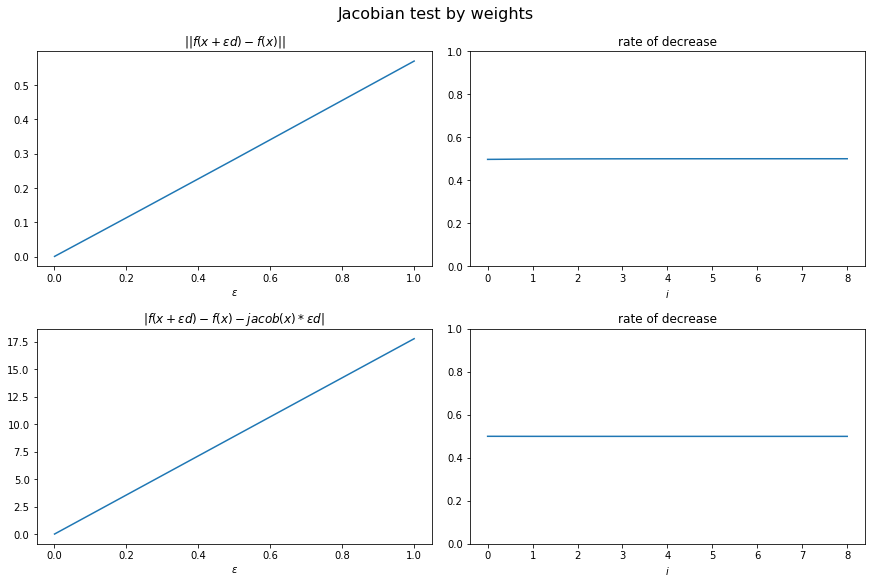

In [9]:
eps0 = 1
eps = np.array([(0.5**i)*eps0 for i in range(10)])

fig, axs = plt.subplots(2, 2, figsize=(12,8), constrained_layout=True)
fig.suptitle('Jacobian test by weights', fontsize=16)

res1 = [np.linalg.norm(f(W + epss * d, b) - f(W, b)) for epss in eps]

axs[0,0].plot(eps, res1)
axs[0,0].set_xlabel('$\epsilon$')
axs[0,0].set_title('$||f(x+\epsilon d) - f(x)||$')

axs[0,1].plot(range(len(res1)-1), [res1[i+1]/res1[i] for i in range(len(res1)-1)])
axs[0,1].set_xlabel('$i$')
axs[0,1].set_title('rate of decrease')
axs[0,1].set_ylim([0, 1])

res2 = [np.linalg.norm(f(W + epss * d, b) - f(W - epss * d, b) - jacob_dw(W, b).dot(2* epss * d.T.ravel())) for epss in eps]

axs[1,0].plot(eps, res2)
axs[1,0].set_xlabel('$\epsilon$')
axs[1,0].set_title('$|f(x+\epsilon d) - f(x) - jacob(x)*\epsilon d|$')

axs[1,1].plot(range(len(res2)-1), [res2[i+1]/res2[i] for i in range(len(res2)-1)])
axs[1,1].set_xlabel('$i$')
axs[1,1].set_title('rate of decrease')
axs[1,1].set_ylim([0, 1])


plt.show()

### jacobian check b

In [10]:
d = np.random.randn(*b.shape)
d = d / np.linalg.norm(d)

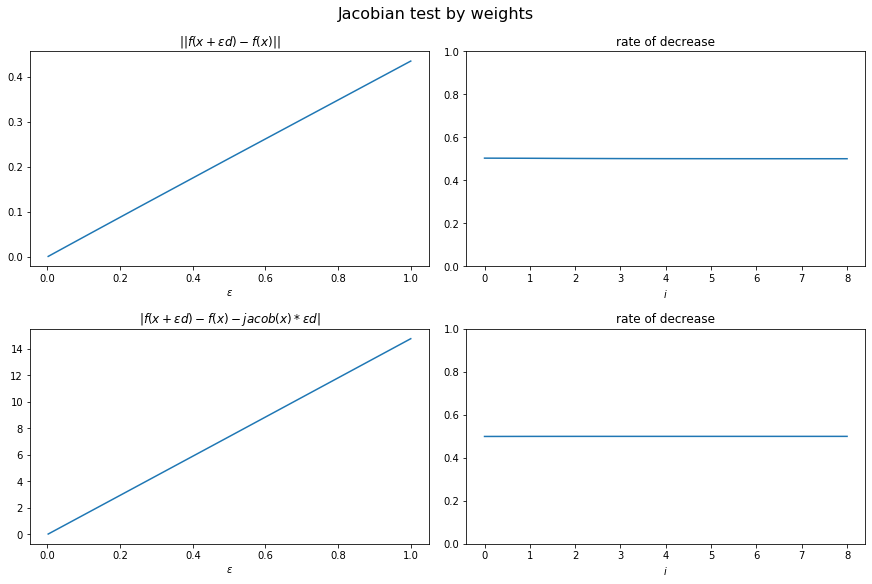

In [26]:
eps0 = 1
eps = np.array([(0.5**i)*eps0 for i in range(10)])

fig, axs = plt.subplots(2, 2, figsize=(12,8), constrained_layout=True)
fig.suptitle('Jacobian test by weights', fontsize=16)

res1 = [np.linalg.norm(f(W, b + epss * d) - f(W, b)) for epss in eps]

axs[0,0].plot(eps, res1)
axs[0,0].set_xlabel('$\epsilon$')
axs[0,0].set_title('$||f(x+\epsilon d) - f(x)||$')

axs[0,1].plot(range(len(res1)-1), [res1[i+1]/res1[i] for i in range(len(res1)-1)])
axs[0,1].set_xlabel('$i$')
axs[0,1].set_title('rate of decrease')
axs[0,1].set_ylim([0, 1])

res2 = [np.linalg.norm(f(W, b + epss * d) - f(W, b - epss * d) - jacob_db(W, b).dot(2* epss * d.T.ravel())) for epss in eps]

axs[1,0].plot(eps, res2)
axs[1,0].set_xlabel('$\epsilon$')
axs[1,0].set_title('$|f(x+\epsilon d) - f(x) - jacob(x)*\epsilon d|$')

axs[1,1].plot(range(len(res2)-1), [res2[i+1]/res2[i] for i in range(len(res2)-1)])
axs[1,1].set_xlabel('$i$')
axs[1,1].set_title('rate of decrease')
axs[1,1].set_ylim([0, 1])


plt.show()

### old shit

In [123]:
# class Abstract_Layer(object):
#     input: np.ndarray

#     def forward(self, x: np.ndarray) -> np.ndarray:
#         raise NotImplementedError

#     def backward(self, d_y: np.ndarray) -> np.ndarray:
#         raise NotImplementedError

#     def parameters(self):
#         return []

# class Linear(Abstract_Layer):
#     def __init__(self, in_nodes, out_nodes):
#         self.type = 'linear'
#         self.weights = Tensor((in_nodes, out_nodes))
#         self.bias = Tensor((1, out_nodes))

#     def forward(self, x: np.ndarray) -> np.ndarray:
#         self.input = x
#         return np.dot(x, self.weights.data) + self.bias.data

#     def backward(self, d_y: np.ndarray) -> np.ndarray:
#         self.weights.grad += np.dot(self.input.T, d_y)
#         self.bias.grad += np.sum(d_y, axis=0, keepdims=True)
#         return np.dot(d_y, self.weights.data.T)

#     def parameters(self):
#         return [self.weights, self.bias]

In [124]:
# class Abstract_Activation(object):
#     def forward(self, x: np.ndarray) -> np.ndarray:
#         raise NotImplementedError

#     def backward(self, d_y: np.ndarray) -> np.ndarray:
#         raise NotImplementedError
        
# class Tanh(Abstract_Activation):
#     inplace: bool
#     activated: np.ndarray

#     def __init__(self, inplace=True):
#         self.type = 'activation'
#         self.inplace = inplace

#     def forward(self, x: np.ndarray) -> np.ndarray:
#         self.activated = np.tanh(x)
#         return self.activated

#     def backward(self, d_y: np.ndarray) -> np.ndarray:
#         return 1.0 - np.tanh(d_y) ** 2

In [8]:
# lin_layer = Linear(2, 100)
# tanh_layer = Tanh()

In [314]:
# x = X[0]
# w = lin_layer.weights.data
# b = lin_layer.bias.data
# d = np.random.randn(*w.shape)
# d = d / np.linalg.norm(d)

In [315]:
# print('x: {}'.format(x.shape))
# print('w: {}'.format(w.shape))
# print('b: {}'.format(b.shape))
# print('d: {}'.format(d.shape))

x: (2,)
w: (2, 100)
b: (1, 100)
d: (2, 100)


In [317]:
# def f(w, b):
# #     l2 = deepcopy(lin_layer)
# #     l2.weights.data = w
# #     l2.bias.data = b
# #     return tanh_layer.forward(l2.forward(x))
#     return np.tanh(w.T @ x + b.ravel())


# def jacmv(w, b, v):
#     # expected:
#     # x: 2
#     # w: 2 x 100
#     # b: 1 x 100
#     # v: 2 x 100
#     # returns 100
#     return jac_w(w, b) @ v.ravel()
# #     l2 = deepcopy(lin_layer)
# #     l2.weights.data = w
# #     l2.bias.data = b
    
# #     x = X[0]
# #     x = x.reshape(x.shape[0], 1)  # in R^{2 times 1}
# #     w = w.T  # in R^{100 times 2}
# #     b = b.T  # in R^{100 times 1}
# #     print('shape b: ' + str(b.shape))
# #     print('shape np.dot(w, x): ' + str(np.dot(w, x).shape))
# #     print('shape np.dot(w, x) + b: ' + str((np.dot(w, x) + b).shape))
# #     der = 1 - np.tanh(np.dot(w, x) + b)**2  # in R^{100 times 1}
# #     print('shape der: ' + str(der.shape))
# #     res = np.multiply(der, v)  # in R^{100 times 1}
# #     print('shape element-wise mult: ' + str(res.shape))
# #     res = np.dot(res, x.T)
# #     print('shape res: ' + str(res.shape))
# #     return res

# def jac_w(w, b):
#     # x: 2
#     # w: 2 x 100
#     # b: 1 x 100
#     # returns: 100 x (2*100) = 100 x 200
#     return np.diag(1.0 - np.tanh(w.T @ x + b.ravel())**2) @ np.kron(np.eye(w.shape[1]), x.T)


# # def jacob_b(w, b):
# #     l2 = deepcopy(lin_layer)
# #     l2.weights.data = w
# #     l2.bias.data = b
# #     e = tanh_layer.forward(l2.forward(X))
# #     e = tanh_layer.backward(e)
# #     e = np.sum(e, axis=0, keepdims=True)
# #     return e

In [318]:
# print('jac_w(w, b): {}'.format(jac_w(w, b).shape))
# print('jacob_w(w, b, d): {}'.format(jacmv(w, b, d).shape))

jac_w(w, b): (100, 200)
jacob_w(w, b, d): (100,)


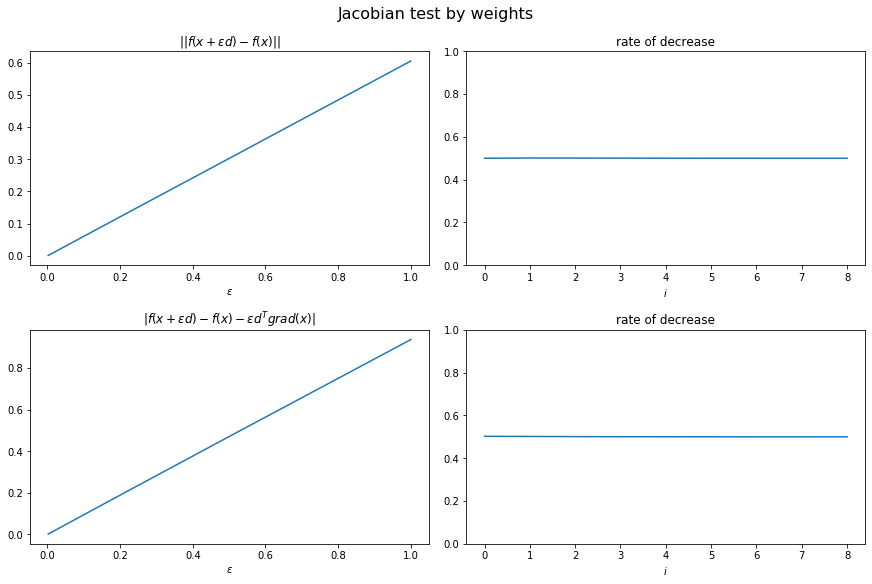

In [319]:
eps0 = 1
eps = np.array([(0.5**i)*eps0 for i in range(10)])

w = lin_layer.weights.data
b = lin_layer.bias.data

fig, axs = plt.subplots(2, 2, figsize=(12,8), constrained_layout=True)
fig.suptitle('Jacobian test by weights', fontsize=16)

res1 = [np.linalg.norm(f(w + epss * d, b) - f(w, b)) for epss in eps]

axs[0,0].plot(eps, res1)
axs[0,0].set_xlabel('$\epsilon$')
axs[0,0].set_title('$||f(x+\epsilon d) - f(x)||$')

axs[0,1].plot(range(len(res1)-1), [res1[i+1]/res1[i] for i in range(len(res1)-1)])
axs[0,1].set_xlabel('$i$')
axs[0,1].set_title('rate of decrease')
axs[0,1].set_ylim([0, 1])

res2 = [np.linalg.norm(f(w + epss * d, b) - f(w, b) - jacmv(w, b, epss * d)) for epss in eps]

axs[1,0].plot(eps, res2)
axs[1,0].set_xlabel('$\epsilon$')
axs[1,0].set_title('$|f(x+\epsilon d) - f(x) - \epsilon d^{T} grad(x)|$')

axs[1,1].plot(range(len(res2)-1), [res2[i+1]/res2[i] for i in range(len(res2)-1)])
axs[1,1].set_xlabel('$i$')
axs[1,1].set_title('rate of decrease')
axs[1,1].set_ylim([0, 1])


plt.show()

In [112]:
b = soft_max_layer.bias.data
d = np.random.random(b.ravel().shape)
d = d / np.sum(d)

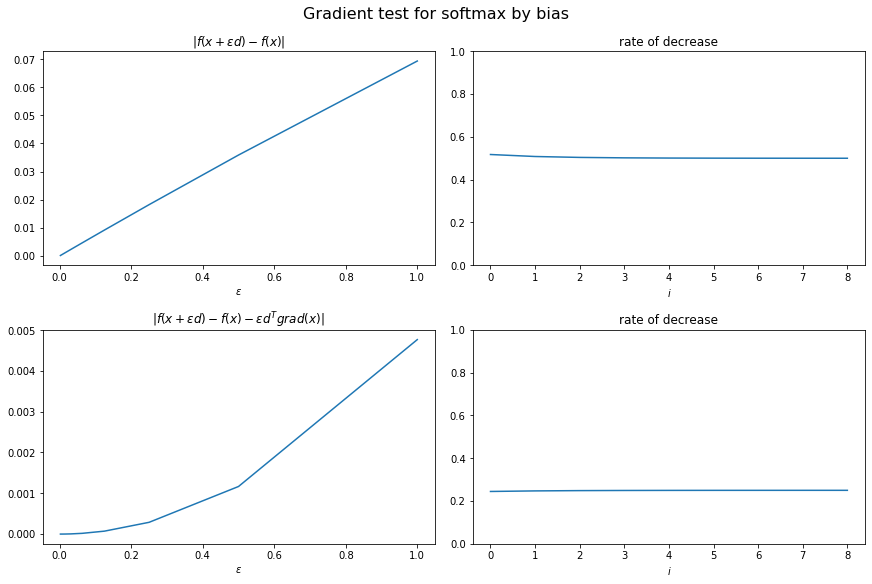

In [115]:
eps0 = 1
eps = np.array([(0.5**i)*eps0 for i in range(10)])

w = soft_max_layer.weights.data
b = soft_max_layer.bias.data

fig, axs = plt.subplots(2, 2, figsize=(12,8), constrained_layout=True)
fig.suptitle('Gradient test for softmax by bias', fontsize=16)

res1 = [np.abs(f(w, b + epss * d.reshape(b.shape)) - f(w, b)) for epss in eps]

axs[0,0].plot(eps, res1)
axs[0,0].set_xlabel('$\epsilon$')
axs[0,0].set_title('$|f(x+\epsilon d) - f(x)|$')

axs[0,1].plot(range(len(res1)-1), [res1[i+1]/res1[i] for i in range(len(res)-1)])
axs[0,1].set_xlabel('$i$')
axs[0,1].set_title('rate of decrease')
axs[0,1].set_ylim([0, 1])

res2 = [np.abs(f(w, b + epss * d.reshape(b.shape)) - f(w, b) - epss * np.dot(d.T, grad_b(w, b))) for epss in eps]

axs[1,0].plot(eps, res2)
axs[1,0].set_xlabel('$\epsilon$')
axs[1,0].set_title('$|f(x+\epsilon d) - f(x) - \epsilon d^{T} grad(x)|$')

axs[1,1].plot(range(len(res2)-1), [res2[i+1]/res2[i] for i in range(len(res)-1)])
axs[1,1].set_xlabel('$i$')
axs[1,1].set_title('rate of decrease')
axs[1,1].set_ylim([0, 1])


plt.show()